## Bank Loan Proportion: Markov Analysis ##

### Objective ###

ABC Bank deals with both asset and liability products in the retail bank industry. A Big portfolio of the bank is based on loans. These loans make the majority of the total revenue earned by the bank. Hence, it is very essential for the bank to find the proportion of the loans 2 years and 3 years from now, and in the long run. Perform Markov Chain Analysis to determine the bank loan proportions. 

The following are the loan classifications:
 - Good Loan
 - Bad Loan
 - Risky Loan
 - Paid Up Loan

### Method ###

 - Generate 1,000 random past loan transitions (e.g. from 'Good Loan' to 'Bad Loan').
 - Compute the conditional probability for each of the loan types (e.g.  Prob(Good Loan | Bad Loan) ).
 - Generate 200 random current loans and compute the current year's loan proportion. 
 - Create the Markov Transition Matrix.
 - Write a script to create Makov Chain Analysis function.
 - Use the Markov Chain Analysis script function to determine the year 2 loan proportion, year 3 loan proportion and loan proportion in the long run.

### Analysis ### 

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import random
import numpy as np
import pandas as pd
import scipy as sp
import scipy.sparse
import matplotlib.pyplot as plt

random.seed(57)

In [2]:
#Creating loan type dictionary for later reference
dictionary = {0: 'Good Loan', 1: 'Bad Loan', 2: 'Risky Loan', 3: 'Paid Up Loan'}
dictionary_inv = {'Good Loan':0, 'Bad Loan': 1, 'Risky Loan':2, 'Paid Up Loan': 3}

#### Generating Random Dataset

In [3]:
#Creating Historical Transactions Using Random Numbers
past_transactions = []
for i in range(1000):
    past_transactions.append([random.randint(0,3), random.randint(0,3)])

past_transactions_array = np.array(past_transactions)

df_past = pd.DataFrame(past_transactions_array, columns = ['From','To'])
df_past['From'] = df_past['From'].map(dictionary)
df_past['To'] = df_past['To'].map(dictionary)
display(df_past)

,From,To
0,Good Loan,Risky Loan
1,Good Loan,Bad Loan
2,Risky Loan,Paid Up Loan
3,Risky Loan,Paid Up Loan
4,Paid Up Loan,Good Loan
...,...,...
995,Paid Up Loan,Bad Loan
996,Good Loan,Risky Loan
997,Paid Up Loan,Risky Loan
998,Bad Loan,Paid Up Loan


In [4]:
#Creating the Current State Transaction
present_transactions = []
for i in range(200):
    present_transactions.append(random.randint(0,3))

df_present = pd.DataFrame(present_transactions, columns=['Present'])
df_present['Present']= df_present['Present'].map(dictionary)
display(df_present)

,Present
0,Risky Loan
1,Paid Up Loan
2,Risky Loan
3,Paid Up Loan
4,Good Loan
...,...
195,Paid Up Loan
196,Good Loan
197,Good Loan
198,Risky Loan


#### Computing Probabilities

In [5]:
#Computing the Historical Transaction Probabilities
#Getting the From Total
df_from = df_past.copy()
df_from['blank'] = 'b'
df_from_total = df_from[['From','To']].groupby('From').count().reset_index().rename(columns={'To': 'From Total'})
df_from_total


,From,From Total
0,Bad Loan,235
1,Good Loan,245
2,Paid Up Loan,236
3,Risky Loan,284


In [6]:
#Getting the From-To Total
df_from_to = df_past.copy()
df_from_to['blank'] = 'b'
df_from_to_total = df_from_to[['From', 'To','blank']].groupby(['From', 'To']).count().reset_index().rename(columns={'blank': 'From-To Total'})
df_from_to_total

,From,To,From-To Total
0,Bad Loan,Bad Loan,64
1,Bad Loan,Good Loan,59
2,Bad Loan,Paid Up Loan,66
3,Bad Loan,Risky Loan,46
4,Good Loan,Bad Loan,53
5,Good Loan,Good Loan,53
6,Good Loan,Paid Up Loan,67
7,Good Loan,Risky Loan,72
8,Paid Up Loan,Bad Loan,67
9,Paid Up Loan,Good Loan,63


In [7]:
df_past_1 = df_past.merge(df_from_total, on=['From'], how='inner')
df_past_2 = df_past_1.merge(df_from_to_total, on = ['From', 'To'])
df_past_portfolio = df_past_2[['From', 'To', 'From-To Total','From Total']].rename(columns={'From Total_y': 'From Total'})
df_past_portfolio = df_past_portfolio.drop_duplicates()
df_past_portfolio.reset_index(drop=True, inplace=True)
df_past_portfolio['Prob'] = df_past_portfolio['From-To Total']/df_past_portfolio['From Total']
dictionary = {0: 'Good Loan', 1: 'Bad Loan', 2: 'Risky Loan', 3: 'Paid Up Loan'}
dictionary_inv = {'Good Loan':0, 'Bad Loan': 1, 'Risky Loan':2, 'Paid Up Loan': 3}
df_past_portfolio['From Index'] = df_past_portfolio['From'].map(dictionary_inv)
df_past_portfolio['To Index'] = df_past_portfolio['To'].map(dictionary_inv)
df_past_portfolio = df_past_portfolio[['From','From Index', 'To', 'To Index', 'From-To Total', 'From Total', 'Prob']]
df_past_portfolio

,From,From Index,To,To Index,From-To Total,From Total,Prob
0,Good Loan,0,Risky Loan,2,72,245,0.293878
1,Good Loan,0,Bad Loan,1,53,245,0.216327
2,Good Loan,0,Paid Up Loan,3,67,245,0.273469
3,Good Loan,0,Good Loan,0,53,245,0.216327
4,Risky Loan,2,Paid Up Loan,3,80,284,0.281690
5,Risky Loan,2,Bad Loan,1,61,284,0.214789
6,Risky Loan,2,Good Loan,0,80,284,0.281690
7,Risky Loan,2,Risky Loan,2,63,284,0.221831
8,Paid Up Loan,3,Good Loan,0,63,236,0.266949
9,Paid Up Loan,3,Paid Up Loan,3,56,236,0.237288


In [8]:
#Computing the present loan portfolio
total_num_present_loan = len(df_present)
total_num_badloan = len(df_present[df_present['Present']=='Bad Loan'])
total_num_goodloan = len(df_present[df_present['Present']=='Good Loan'])
total_num_riskloan = len(df_present[df_present['Present']=='Risky Loan'])
total_num_paidloan = len(df_present[df_present['Present']=='Paid Up Loan'])
percent_bad = total_num_badloan/total_num_present_loan
percent_good = total_num_goodloan/total_num_present_loan
percent_risk = total_num_riskloan/total_num_present_loan
percent_paid = total_num_paidloan/total_num_present_loan
present_portfolio_dict = {'Bad Loan': percent_bad, 'Good Loan': percent_good,
                          'Risky Loan': percent_risk, 'Paid Up Loan': percent_paid}
df_present_portfolio = df_present
df_present_portfolio['Prob'] = df_present_portfolio['Present'].map(present_portfolio_dict)
df_present_portfolio = df_present_portfolio.drop_duplicates()
df_present_portfolio.reset_index(drop=True, inplace=True)
df_present_portfolio['Index'] = df_present_portfolio['Present'].map(dictionary_inv)
df_present_portfolio = df_present_portfolio[['Present', 'Index', 'Prob']]
df_present_portfolio

,Present,Index,Prob
0,Risky Loan,2,0.230
1,Paid Up Loan,3,0.305
2,Good Loan,0,0.270
3,Bad Loan,1,0.195


#### Creating the Transition and Initial Matrix ###

matrix([[0.21632653, 0.21632653, 0.29387755, 0.27346939],
        [0.25106383, 0.27234043, 0.19574468, 0.28085106],
        [0.28169014, 0.21478873, 0.22183099, 0.28169014],
        [0.26694915, 0.28389831, 0.21186441, 0.23728814]])

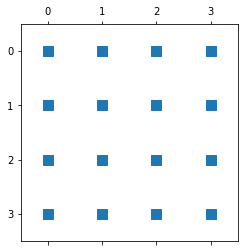

In [9]:
#Creating the Transition Matrix
data= df_past_portfolio['Prob']
rows = df_past_portfolio['From Index']
cols = df_past_portfolio['To Index']
n=len(dictionary)
P = sp.sparse.coo_matrix((data, (rows, cols)), shape=(n,n))
plt.spy(P)

transition_matrix = sp.sparse.coo_matrix.todense(P)
transition_matrix

In [10]:
#Initial State
initial_matrix = np.array(df_present_portfolio['Prob'])
initial_matrix

array([0.23 , 0.305, 0.27 , 0.195])

#### Performing Markov Chain Analysis 

In [11]:
#Creating the Markov Function

def Markov_Chain(P, x0, t_max):
    x= x0
    for t in range(t_max):
        x = P.T.dot(x)
    return x

In [12]:
#Portfolio in year 2
year2 = Markov_Chain(P, initial_matrix, 2)
year2

array([0.2535265 , 0.24806838, 0.23104107, 0.26736405])

In [13]:
#Portfolio in year 3
year3 = Markov_Chain(P, initial_matrix, 3)
year3

array([0.2535801 , 0.24793278, 0.23096081, 0.26752631])

In [14]:
#Portfolio in the long run (Steady State)
steady_state = Markov_Chain(P, initial_matrix, 100000)
steady_state

array([0.25357848, 0.24793595, 0.23096646, 0.26751911])

### Conclusion

The table below shows the loan propportion 2 years from now, 3 years from now and in the long run

In [15]:
#Markov Summary
data = {'Loan Category': ['Good Loan', 'Bad Loan', 'Risky Loan', 'Paid Up Loan'],
       'Loan Proportion at Present': initial_matrix, 'Loan Proportion in year 2': year2, 'Loan Proportion in year 3': year3,
       'Loan Proportion in the Long Run': steady_state}
df_markov = pd.DataFrame(data)
display(df_markov)

,Loan Category,Loan Proportion at Present,Loan Proportion in year 2,Loan Proportion in year 3,Loan Proportion in the Long Run
0,Good Loan,0.230,0.253527,0.253580,0.253578
1,Bad Loan,0.305,0.248068,0.247933,0.247936
2,Risky Loan,0.270,0.231041,0.230961,0.230966
3,Paid Up Loan,0.195,0.267364,0.267526,0.267519
